# Experiment Analysis Area Of Patterns Retained
In this notebook we will evaluate the results form the experiments executed. For each experiment, one parameter is changed and all others were kept constant as to determine the effect of one variable. 

**The goals of this analysis are:**
1. Determine the relationship of the number of parameters in the neural network and Area of the patterns that can be retained 
2. Investigate which activation function lead to the retention of Area
3. Determine what effect bidirectional RNNs has on this relationship
4. Determine the effect of increasing the number of layers has on Area retention

To determine whether a relationshop exists between the variable being investigated and the number of required parameters in each respective neural network, the Pearson correlation coefficient is used. The domain of this metric lies between -1 and +1 or in mathematical notation $P \in [-1, 1]$. If there exists a strong positive relationship between variables, the Pearson coefficient will approach +1 and for the negative case -1. 

In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import pandas as pd
from sqlalchemy import Column, Integer, String
from sqlalchemy import create_engine, Column
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Pattern Area Analysis

In [2]:
! wc -l /home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/100_0_False_volume_experiment.log

411 /home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/100_0_False_volume_experiment.log


In [2]:
LSTM="lstm"
ELMAN_RNN="elman"
JORDAN_RNN="jordan"
GRU="gru"
BIDIRECTIONAL_RNN="bidirelamn"
BIDIRECTIONAL_LSTM="bidirlstm"
BIDIRECTIONAL_GRU="bidirgru"

def determine_model_parameters(row):
    nodes_in_layers = eval(row["nodes_in_layer"])
    nn_type = row["nn_type"]
    if nn_type == BIDIRECTIONAL_RNN:
        return sum(nodes_in_layers) * 6
    if nn_type == BIDIRECTIONAL_GRU:
        return sum(nodes_in_layers) * 21
    if nn_type == BIDIRECTIONAL_LSTM:
        return sum(nodes_in_layers) * 24
    if nn_type == LSTM:
        return sum(nodes_in_layers) *12
    if nn_type == GRU:
        return sum(nodes_in_layers) *9
    return sum(nodes_in_layers) * 3


In [21]:
df = pd.read_csv("/home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/from_server/100_0_False_volume_experiment.log", delimiter=";")
df["nn_type"] = df["nn_type"].apply(lambda x: x.replace("INFO:root:", "")) 
df["diff_small_large"] = df["smallest_not_retained"] - df["largest_retained"]
df["diff_small_large_len"] =  df["largest_len_retained"] - df["Unnamed: 6"]
df["model_params"] = df.apply(lambda row: determine_model_parameters(row), axis=1)
df["nodes_in_layer"] = df["nodes_in_layer"].apply(eval)
df["area"] = df["largest_retained"] * df["Unnamed: 6"]

# df = df[(df["diff_small_large"]  == 0) & (df["diff_small_large_len"]  == 1)]
df

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,Unnamed: 6,largest_len_retained,smallest_len_not_retained,status,model_params,num_epochs,model_score,highest_F1,diff_small_large,diff_small_large_len,area
0,lstm,softmax,504,[42],1,12,8,0,"{'val_loss': [3.807293176651001], 'loss': [3.8...",1.0,504,NaN,NaN,NaN,11,-8,8
1,lstm,elu,504,[42],1,12,8,0,"{'val_loss': [3.609874963760376], 'loss': [3.7...",1.0,504,NaN,NaN,NaN,11,-8,8
2,lstm,elu,504,[42],1,14,8,0,"{'val_loss': [14.46240234375], 'loss': [14.942...",1.0,504,NaN,NaN,NaN,13,-8,8
3,lstm,elu,504,[42],1,18,8,0,"{'val_loss': [63.046478271484375], 'loss': [64...",1.0,504,NaN,NaN,NaN,17,-8,8
4,lstm,elu,504,[42],1,8,8,8,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [63.046478271484375], 'loss': [64...",1.0,NaN,7,0,8
5,lstm,elu,504,[42],2,20,2,699,"{'val_loss': [2.2484652996063232, 2.0748842954...",0.75,504,NaN,NaN,NaN,18,697,4
6,lstm,elu,504,[42],2,21,2,0,"{'val_loss': [0.8614286780357361], 'loss': [0....",1.0,504,NaN,NaN,NaN,19,-2,4
7,lstm,elu,504,[42],2,8,1,2,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [0.8614286780357361], 'loss': [0....",1.0,NaN,6,1,2
8,lstm,elu,504,[42],4,40,2,699,"{'val_loss': [1.6602900624275208, 1.4926756024...",0.625,504,NaN,NaN,NaN,36,697,8
9,lstm,elu,504,[42],4,41,2,0,"{'val_loss': [0.88064906001091], 'loss': [0.93...",1.0,504,NaN,NaN,NaN,37,-2,8


In [5]:
df[(df["nn_type"] == "bidirlstm") & (df[(df["nn_type"] == "bidirlstm")]["largest_retained"] == df[(df["nn_type"] == "bidirlstm")]["largest_retained"].max())]

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,Unnamed: 6,largest_len_retained,smallest_len_not_retained,status,model_params,num_epochs,model_score,highest_F1,diff_small_large,diff_small_large_len,area
533,bidirlstm,softmax,504,[21],8,80,2,699,"{'val_loss': [1.3326675295829773, 1.2966076135...",0.29059089781746034,504,NaN,NaN,NaN,72,697,16
534,bidirlstm,softmax,504,[21],8,81,2,0,"{'val_loss': [0.9789214134216309], 'loss': [0....",1.0,504,NaN,NaN,NaN,73,-2,16
535,bidirlstm,softmax,504,[21],8,8,1,2,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [0.9789214134216309], 'loss': [0....",1.0,NaN,0,1,8
546,bidirlstm,elu,504,[21],8,80,2,699,"{'val_loss': [1.207161784172058, 1.05773109197...",0.5574404761904762,504,NaN,NaN,NaN,72,697,16
547,bidirlstm,elu,504,[21],8,81,2,0,"{'val_loss': [0.9080487191677094], 'loss': [0....",1.0,504,NaN,NaN,NaN,73,-2,16
548,bidirlstm,elu,504,[21],8,8,1,2,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [0.9080487191677094], 'loss': [0....",1.0,NaN,0,1,8
560,bidirlstm,selu,504,[21],8,80,2,699,"{'val_loss': [0.8657066226005554, 0.5731668770...",0.5575799851190476,504,NaN,NaN,NaN,72,697,16
561,bidirlstm,selu,504,[21],8,81,2,0,"{'val_loss': [0.6765260100364685], 'loss': [0....",1.0,504,NaN,NaN,NaN,73,-2,16
562,bidirlstm,selu,504,[21],8,8,1,2,found,<keras.engine.training.Model object at 0x7fbb2...,504,"{'val_loss': [0.6765260100364685], 'loss': [0....",1.0,NaN,0,1,8
573,bidirlstm,softplus,504,[21],8,80,2,699,"{'val_loss': [2.097662091255188, 0.92740330100...",0.26552269345238094,504,NaN,NaN,NaN,72,697,16


## 1. Number of parameters $\varpropto$ pattern length
#### Relationship of the number of parameters in network to length of patterns retained 

### Overall

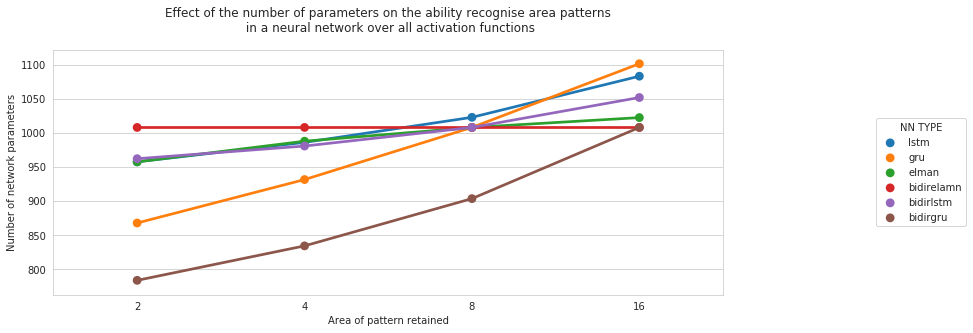

In [22]:
from matplotlib import pyplot


def get_cmap(n, name='hsv'):
    import matplotlib.pyplot as plt
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_line_sub_plots(df, x="num_layers", y="largest_retained", hue="activation_func",
                        x_label="num_layers", y_label="largest_retained", legend_loc='upper left'):
    import numpy as np
    import matplotlib.pyplot as plt
    unique_hue = df[hue].unique().tolist()
    n_rows = (int)(np.ceil(len(unique_hue)/2))
    fig, ax = plt.subplots(nrows=n_rows, ncols=2, sharex=True, sharey=True, constrained_layout=True)
    fig.set_size_inches(20, 4*n_rows)
    
    cmap = get_cmap(len(unique_hue))
    row_c = 0
    col_c = 0
    index = 0
    for row_c in range(n_rows):
        for col_c in range(2):
            if index > len(unique_hue) - 1:
                break
            ax[row_c][col_c].set_xlabel(x_label, fontsize=15)
            ax[row_c][col_c].set_ylabel(y_label, fontsize=15)
            ax[row_c][col_c].legend([unique_hue[index]])
            
            df_temp = df[df[hue] == unique_hue[index]]
            ax[row_c][col_c].plot(df_temp[x], df_temp[y], label=unique_hue[index], marker='o', 
                                  linewidth=2, markersize=12, color=cmap(index))

            legend = ax[row_c][col_c].legend(loc=legend_loc, shadow=False, fontsize=15)
            
            index += 1
        # Put a nicer background color on the legend.
        # legend.get_frame().set_facecolor('C0')
    
    plt.show()
    return fig
    
    
def plot_by_filter(x_col, 
                   y_col, 
                   x_label='Sparsity length',
                   y_label='Number of network parameters',
                   title="Effect of sparsity on the number of parameters \n in a neural network with activation ", 
                   hue="network_type",
                   filter_col="activation_function", 
                   filter_val="tanh",
                   legend_title="NN TYPE",
                  df=None):
    sns.set_style("whitegrid")
    a4_dims = (12, 4.5)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax.set(xlabel=x_label, 
       ylabel=y_label )
    if filter_val is not None:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',  linestyle='-', markersize=5, ci=None,
                          data = df[df[filter_col] == filter_val])
       
        ax.axes.set_title(title + filter_val,
                          fontsize=12, y=1.05)
        ax.set(xlabel=x_label, 
       ylabel=y_label )
        ax.legend(title=filter_val.upper(), loc='left', bbox_to_anchor=(1.37, 0.5), ncol=1)
    else:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',   linestyle='-', markersize=5, ci=None,
                          data = df)
        ax.axes.set_title(title, fontsize=12, y=1.05)
        ax.set(xlabel=x_label, 
       ylabel=y_label )
        ax.legend(title=legend_title, loc='center right', bbox_to_anchor=(1.37, 0.5), ncol=1)

    # plt.legend()
filter_col = "nn_type"
filter_1 = "area"
x_col = "area"
x_label = "Area of Patterns"
plot_by_filter(x_col=x_col, 
               y_col="model_params",
               x_label="Area of pattern retained",
               y_label='Number of network parameters',
               title="Effect of the number of parameters on the ability recognise area patterns" + 
                       "\n in a neural network over all activation functions", 
               hue="nn_type",
              filter_col=filter_col, filter_val=None, df=df)    

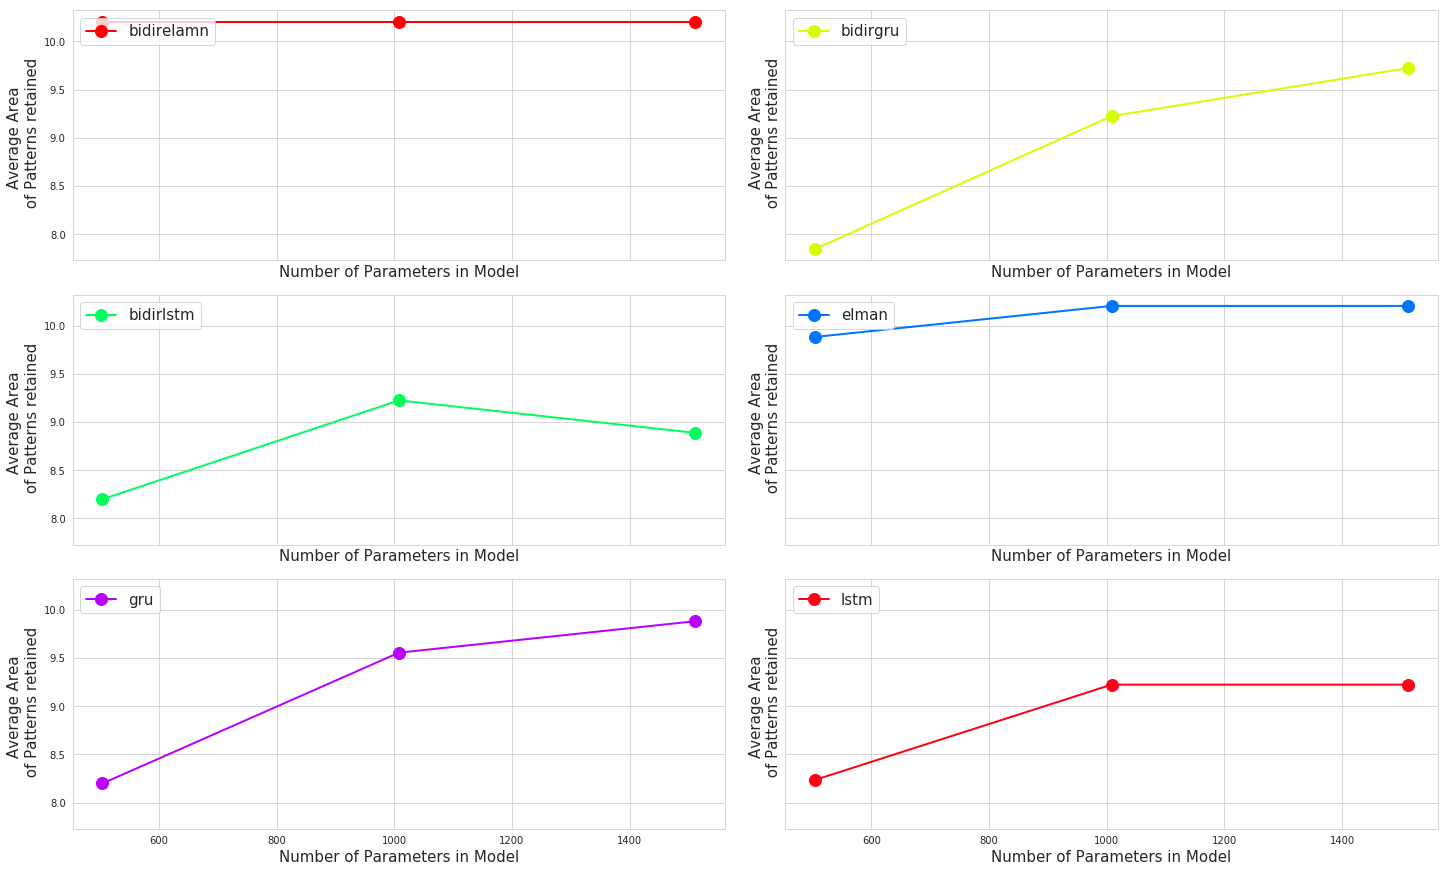

In [28]:
df_g = df.groupby(["nn_type", "model_params"]).agg({"area" : "mean"}).reset_index()
fig = plot_line_sub_plots(df_g, 
            x="model_params", y="area", hue="nn_type",
            x_label='Number of Parameters in Model', y_label='Average Area \n of Patterns retained')
fig.savefig("Images/AreaPatternsVsParametersRNN_exp3_1.pdf", bbox_inches='tight')

### Correlation

In [25]:
x_col = "area"
filter_col = "nn_type"
filter_col_1 = x_col
x_label = "Number of Patterns"
for filter_val in df[filter_col].unique():
    df_temp = df[df[filter_col] == filter_val]
    df_temp = df_temp.groupby([x_col, "nn_type"]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[x_col] = df_temp[x_col].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    df_temp.dropna(inplace=True)
    print("Spearman Correlation Between "+x_label+" length and Number of Network Parameters for", filter_val, df_temp[x_col].corr(df_temp["model_params"], method="spearman"))

Spearman Correlation Between Number of Patterns length and Number of Network Parameters for lstm 1.0
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for gru 1.0
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for elman 1.0
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for bidirelamn nan
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for bidirlstm 1.0
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for bidirgru 1.0


In [27]:
print("\\begin{table}[h!]")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c| } ")

print(" \\toprule")
print(" RNN  &    Spearman Correlation Coefficient \\\\")
print(" \\midrule")

filter_col = "nn_type"
filter_col_1 = x_col
for filter_val in sorted(df[filter_col].unique()):
    df_temp = df[df[filter_col] == filter_val]
    df_temp = df_temp.groupby([x_col, "nn_type"]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[x_col] = df_temp[x_col].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    
    print(" ",filter_val, " & ", df_temp[x_col].corr(df_temp["model_params"], method="spearman"), "\\\\")

print(" \\hline")
print("\\end{tabular}")
print("\\caption{Correlation between Area of patterns retained \\\\ and the number of network parameters}")
print("\\label{tab:Area of patterns vs num network parameters}")
print("\\end{center}")
print("\\end{table}")

\begin{table}[h!]
\begin{center}
\begin{tabular}{ |c|c| } 
 \toprule
 RNN  &    Spearman Correlation Coefficient \\
 \midrule
  bidirelamn  &  nan \\
  bidirgru  &  1.0 \\
  bidirlstm  &  1.0 \\
  elman  &  1.0 \\
  gru  &  1.0 \\
  lstm  &  1.0 \\
 \hline
\end{tabular}
\caption{Correlation between Area of patterns retained \\ and the number of network parameters}
\label{tab:Area of patterns vs num network parameters}
\end{center}
\end{table}


### Pattern Area retention

In [30]:
df_cap = df.groupby(["nn_type"]).agg({"model_params" : "sum", "area": "sum"})
df_cap["capacity_ratio"] = df_cap["area"]/df_cap["model_params"]
df_cap

,area,model_params,capacity_ratio
nn_type,,,
bidirelamn,4194,414288,0.010123
bidirgru,2888,298872,0.009663
bidirlstm,3492,402192,0.008682
elman,4140,413784,0.010005
gru,3708,407736,0.009094
lstm,3452,397656,0.008681


In [31]:
print("\\begin{table}[h!]")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c| } ")

print(" \\toprule")
print(" RNN  &    Pattern Capacity Per Parameter \\\\")
print(" \\midrule")

for i, r in df_cap.reset_index().iterrows():
    print(" ",r["nn_type"], " & ", round(r["capacity_ratio"], 7), "\\\\")

    
print(" \\hline")
print("\\end{tabular}")
print("\\caption{Area of patterns retained \\\\ per single network parameter}")
print("\\label{tab:Area of patterns single param}")
print("\\end{center}")
print("\\end{table}")

\begin{table}[h!]
\begin{center}
\begin{tabular}{ |c|c| } 
 \toprule
 RNN  &    Pattern Capacity Per Parameter \\
 \midrule
  bidirelamn  &  0.0101234 \\
  bidirgru  &  0.009663 \\
  bidirlstm  &  0.0086824 \\
  elman  &  0.0100052 \\
  gru  &  0.0090941 \\
  lstm  &  0.0086809 \\
 \hline
\end{tabular}
\caption{Area of patterns retained \\ per single network parameter}
\label{tab:Area of patterns single param}
\end{center}
\end{table}


## 2. Investigate which activation function lead to the highest retention of length of pattern

In [32]:
print("\\begin{table}[h!]")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c| } ")
print(" \\toprule")
print(" Activation function  &    Spearman Correlation Coefficient \\\\")
print(" \\midrule")

filter_col = "activation_func"
filter_col_1 = x_col
for filter_val in sorted(df[filter_col].unique()):
    df_temp = df[(df[filter_col] == filter_val)]
    df_temp = df_temp.groupby([filter_col_1]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[filter_col_1] = df_temp[filter_col_1].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    
    print(" ",filter_val, " & ", df_temp[filter_col_1].corr(df_temp["model_params"], method='spearman', ), "\\\\")
    
    

print(" \\hline")
print("\\end{tabular}")
print("\\caption{Correlation between Area of patterns retained \\\\ and the number of network parameters \\\\ for each activation function}")
print("\\label{tab:Area of patterns vs num network parameters for each activation function}")
print("\\end{center}")
print("\\end{table}")

\begin{table}[h!]
\begin{center}
\begin{tabular}{ |c|c| } 
 \toprule
 Activation function  &    Spearman Correlation Coefficient \\
 \midrule
  elu  &  1.0 \\
  hard_sigmoid  &  nan \\
  linear  &  1.0 \\
  relu  &  1.0 \\
  selu  &  1.0 \\
  sigmoid  &  1.0 \\
  softmax  &  -0.2581988897471611 \\
  softplus  &  1.0 \\
  softsign  &  1.0 \\
  tanh  &  1.0 \\
 \hline
\end{tabular}
\caption{Correlation between Area of patterns retained \\ and the number of network parameters \\ for each activation function}
\label{tab:Area of patterns vs num network parameters for each activation function}
\end{center}
\end{table}


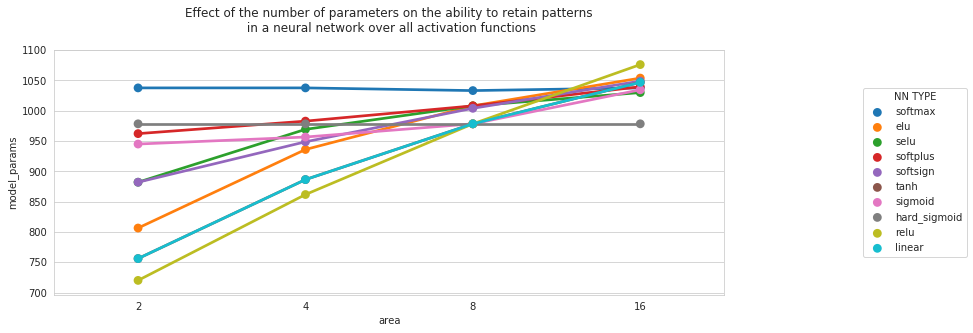

In [11]:
filter_col = "activation_func"
filter_1 = "area"
x_col = "area"
x_label = "Number of Patterns"
plot_by_filter(x_col=x_col, 
               y_col="model_params",
               x_label=x_label,
               y_label='Number of network parameters',
               title="Effect of the number of parameters on the ability to retain patterns" + 
                       "\n in a neural network over all activation functions", 
               hue="activation_func",
              filter_col=filter_col, filter_val=None, df=df)    

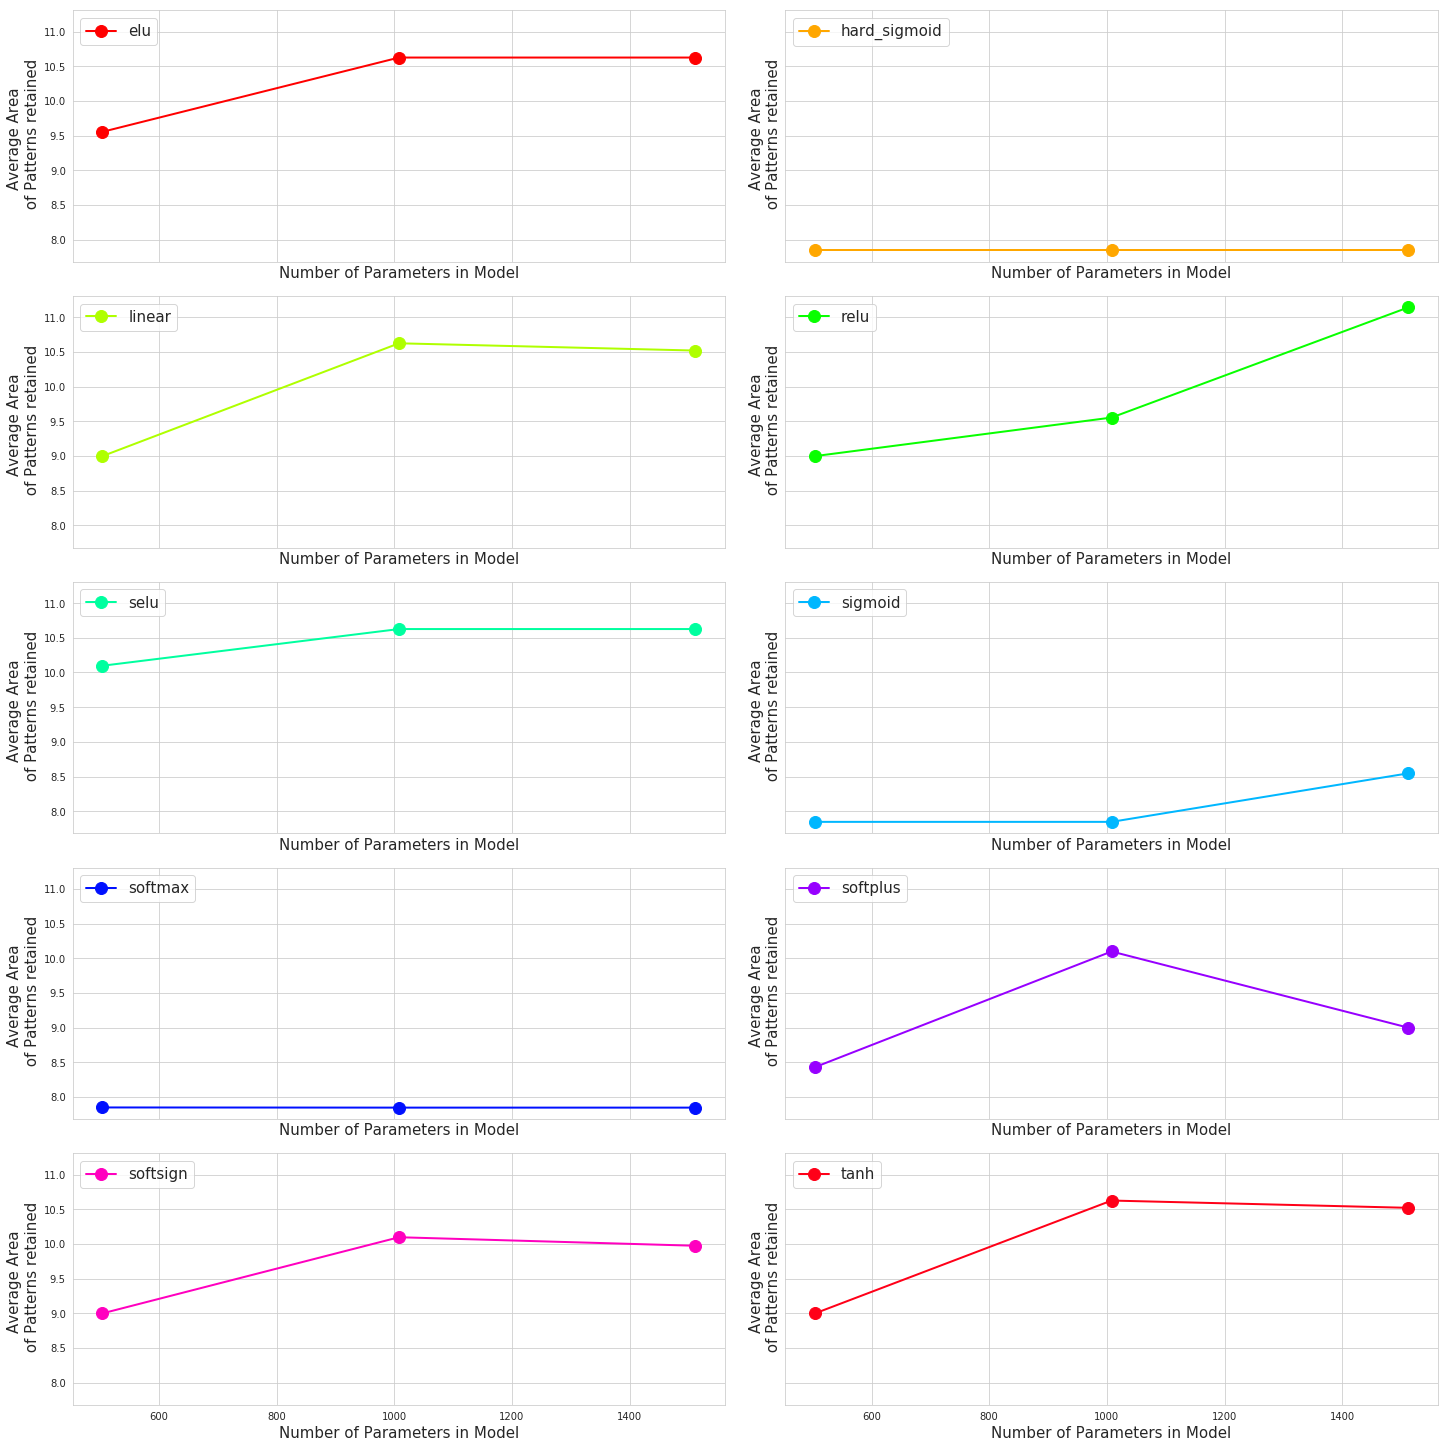

In [33]:
df_g = df.groupby(["activation_func", "model_params"]).agg({"area" : "mean"}).reset_index()

fig = plot_line_sub_plots(df_g, 
            x="model_params", y="area", hue="activation_func",
            x_label='Number of Parameters in Model', y_label='Average Area \n of Patterns retained')
fig.savefig("Images/AreaPatternsVsParametersActFunc_exp3_1.pdf", bbox_inches='tight')

### Correlation of activation functions  ∝ area of pattern

In [12]:
df[filter_col].unique()

array(['softmax', 'elu', 'selu', 'softplus', 'softsign', 'tanh',
       'sigmoid', 'hard_sigmoid', 'relu', 'linear'], dtype=object)

In [36]:
filter_col = "activation_func"
filter_col_1="area"
df_correlation_matrix = pd.DataFrame(columns=df["nn_type"].unique())
df_correlation_matrix["activation_func"] = df[filter_col].unique()
df_correlation_matrix.index =  df_correlation_matrix["activation_func"]
del df_correlation_matrix["activation_func"]
for filter_val in df[filter_col].unique():
    for filter_val_1 in df["nn_type"].unique():
        df_temp = df[(df["nn_type"] == filter_val_1) & (df["activation_func"] == filter_val)]
        df_temp["model_params"] = df_temp["model_params"].astype(float)
        df_correlation_matrix.at[filter_val, filter_val_1] =   df_temp[filter_col_1].corr(df_temp["model_params"], method="spearman")
        print("df_correlation_matrix Correlation Between "+x_label+" and Number of Network Parameters for", filter_val_1 + " "+ filter_val, df_temp[filter_col_1].corr(df_temp["model_params"], method="spearman"), df_temp[filter_col_1].cov(df_temp["model_params"]))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for lstm softmax -0.020703244797790767 -4.307692307692324
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for gru softmax 0.0 2.673884505623535e-14
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for elman softmax 0.0 2.673884505623535e-14
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirelamn softmax 0.0 2.673884505623535e-14
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirlstm softmax 0.0 2.673884505623535e-14
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirgru softmax 0.0 2.673884505623535e-14
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for lstm elu 0.30035043273638007 553.1707317073169
df_

In [37]:
df_correlation_matrix

,lstm,gru,elman,bidirelamn,bidirlstm,bidirgru
activation_func,,,,,,
softmax,-0.0207032,0,0,0,0,0
elu,0.30035,0,-0.30035,0,0.313625,0.30035
selu,-0.30035,0.30035,0,0,0,0.313625
softplus,0,0,0.30035,0,0,0
softsign,0,0.30035,0,0,0,0.267131
tanh,0.313625,0.30035,0,0,0,0.37551
sigmoid,0,0,0.313625,0,0,0
hard_sigmoid,0,0,0,0,0,0
relu,0.30035,0.313625,0,0,0.313625,0


In [38]:
df_correlation_matrix.sort_index(inplace=True)
df_correlation_matrix = df_correlation_matrix[sorted(df_correlation_matrix.columns)]
for c in df_correlation_matrix.columns:
    df_correlation_matrix[c] = df_correlation_matrix[c].apply(lambda x: round(x, 4)) 

df_correlation_matrix.sort_index(inplace=True)
print("\\begin{table}[h!]")
print("{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\\\")
print("\\midrule")
print(df_correlation_matrix.to_latex())
print("\\caption{Correlation between Area of patterns retained \\\\ and the number of network parameters \\\\ per activation function for each RNN}")
print("\\label{tab:Area of patterns per Activation function vs num network parameters for each RNN}")
print("\\end{table}")

\begin{table}[h!]
{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\
\midrule
\begin{tabular}{lrrrrrr}
\toprule
{} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\
activation\_func &             &           &            &         &         &         \\
\midrule
elu             &         0.0 &    0.3004 &     0.3136 & -0.3004 &  0.0000 &  0.3004 \\
hard\_sigmoid    &         0.0 &    0.0000 &     0.0000 &  0.0000 &  0.0000 &  0.0000 \\
linear          &         0.0 &    0.3755 &     0.0000 &  0.0000 &  0.3004 &  0.3136 \\
relu            &         0.0 &    0.0000 &     0.3136 &  0.0000 &  0.3136 &  0.3004 \\
selu            &         0.0 &    0.3136 &     0.0000 &  0.0000 &  0.3004 & -0.3004 \\
sigmoid         &         0.0 &    0.0000 &     0.0000 &  0.3136 &  0.0000 &  0.0000 \\
softmax         &         0.0 &    0.0000 &     0.0000 &  0.0000 &  0.0000 & -0.0207 \\
softplus        &         0.0 &    0.0000 &     0.0000 

### Sequence Area Capacity

In [39]:
df_cap = df.groupby(["nn_type", "activation_func"]).agg({"model_params" : "sum", "area": "sum"})
df_cap["capacity_ratio"] = df_cap["area"]/df_cap["model_params"]
df_cap = pd.DataFrame(df_cap.to_records())
df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap

nn_type,bidirelamn,bidirgru,bidirlstm,elman,gru,lstm
activation_func,,,,,,
elu,0.011054,0.009897,0.008818,0.010141,0.011054,0.009897
hard_sigmoid,0.007784,0.010379,0.007784,0.007784,0.007784,0.007784
linear,0.011054,0.012485,0.008929,0.011054,0.009897,0.008818
relu,0.011054,0.010379,0.008818,0.011054,0.008818,0.009897
selu,0.011054,0.008818,0.011054,0.011054,0.009897,0.010141
sigmoid,0.007784,0.010379,0.007784,0.008818,0.007784,0.007784
softmax,0.007784,0.007784,0.007784,0.007784,0.007784,0.006373
softplus,0.011054,0.007784,0.008929,0.009897,0.007784,0.008929
softsign,0.011054,0.010028,0.007784,0.011054,0.009897,0.007784


In [40]:
df_cap.sort_index(inplace=True)
df_cap = df_cap[sorted(df_cap.columns)]
# for c in df_cap.columns:
#     df_cap[c] = df_cap[c].apply(lambda x: round(x, 8)) 

df_cap.sort_index(inplace=True)
print("\\begin{table}[h!]")
print("{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\\\")
print("\\midrule")
print(df_cap.to_latex())
print("\\caption{Per parameter capacity between Area of patterns retained \\\\ and the number of network parameters \\\\ per activation function for each RNN}")
print("\\label{tab:Area of patterns per Activation function vs num network parameters for each RNN}")
print("\\end{table}")

\begin{table}[h!]
{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\
\midrule
\begin{tabular}{lrrrrrr}
\toprule
nn\_type &  bidirelamn &  bidirgru &  bidirlstm &     elman &       gru &      lstm \\
activation\_func &             &           &            &           &           &           \\
\midrule
elu             &    0.011054 &  0.009897 &   0.008818 &  0.010141 &  0.011054 &  0.009897 \\
hard\_sigmoid    &    0.007784 &  0.010379 &   0.007784 &  0.007784 &  0.007784 &  0.007784 \\
linear          &    0.011054 &  0.012485 &   0.008929 &  0.011054 &  0.009897 &  0.008818 \\
relu            &    0.011054 &  0.010379 &   0.008818 &  0.011054 &  0.008818 &  0.009897 \\
selu            &    0.011054 &  0.008818 &   0.011054 &  0.011054 &  0.009897 &  0.010141 \\
sigmoid         &    0.007784 &  0.010379 &   0.007784 &  0.008818 &  0.007784 &  0.007784 \\
softmax         &    0.007784 &  0.007784 &   0.007784 &  0.007784 &  0.007784 &  0.00637

            # TOTOTOTOTOTODOODODODODOODODODO

## 3. Relationship between the length of pattern and number of layers

In [41]:
df["num_layers"] = df["nodes_in_layer"].apply(len)
df.groupby(["num_layers", "model_params"]).agg({"area": "mean"})

area
num_layers model_params          
1          504           8.788265
           1008          9.610358
           1512          9.690027

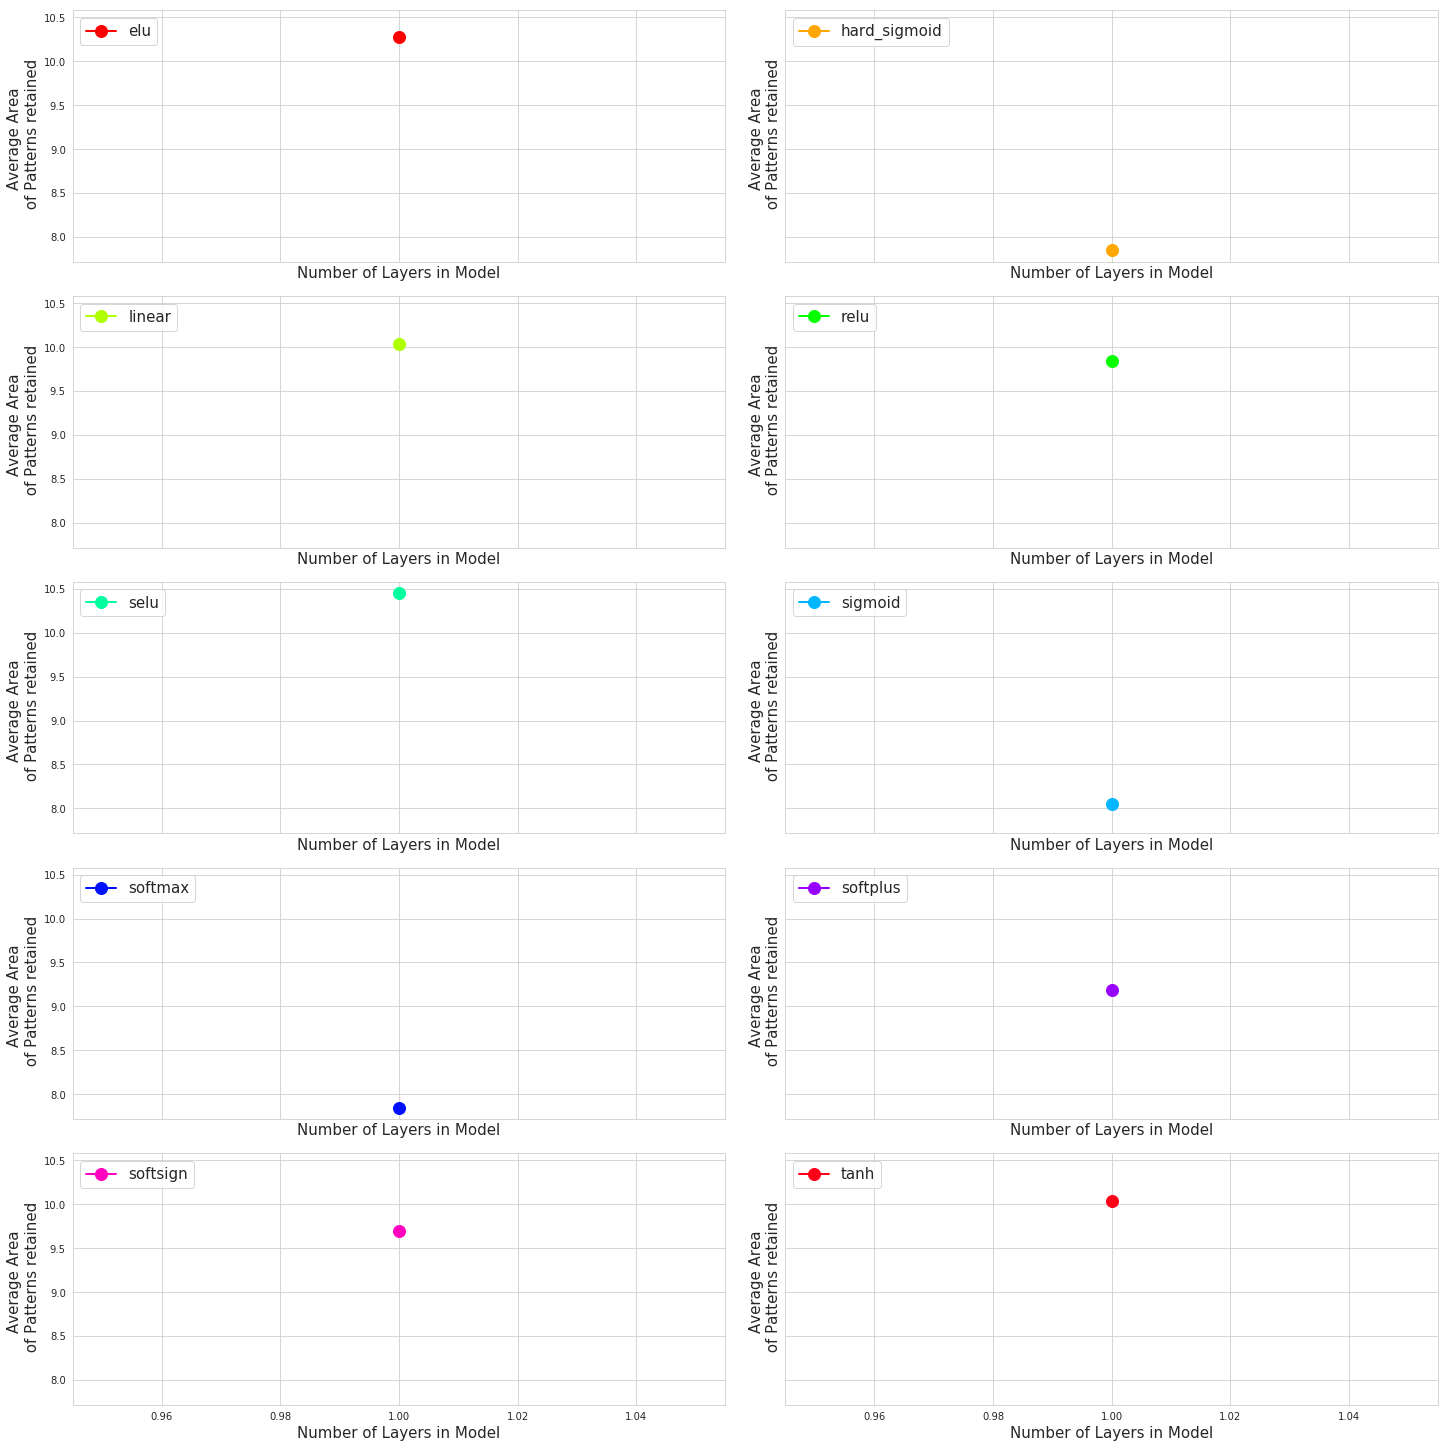

In [42]:
df_g = df.groupby(["activation_func", "num_layers"]).agg({"area" : "mean"}).reset_index()
fig = plot_line_sub_plots(df_g, 
            x="num_layers", y="area", hue="activation_func",
            x_label='Number of Layers in Model', y_label='Average Area \n of Patterns retained')
fig.savefig("Images/AreaPatternsVsNumLayersActFunc_exp3_1.pdf", bbox_inches='tight')

In [45]:
df_cap = df.groupby(["nn_type", "activation_func", "num_layers"]).agg({"model_params" : "sum", "area": "sum"})
df_cap = pd.DataFrame(df_cap.to_records())
df_cap["capacity_ratio"] = df_cap["area"]/df_cap["model_params"]
# df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap

,nn_type,activation_func,num_layers,area,model_params,capacity_ratio
0,bidirelamn,elu,1,468,42336,0.011054
1,bidirelamn,hard_sigmoid,1,306,39312,0.007784
2,bidirelamn,linear,1,468,42336,0.011054
3,bidirelamn,relu,1,468,42336,0.011054
4,bidirelamn,selu,1,468,42336,0.011054
5,bidirelamn,sigmoid,1,306,39312,0.007784
6,bidirelamn,softmax,1,306,39312,0.007784
7,bidirelamn,softplus,1,468,42336,0.011054
8,bidirelamn,softsign,1,468,42336,0.011054
9,bidirelamn,tanh,1,468,42336,0.011054


In [46]:
df_cap["capacity_ratio_diff"] = [0]*df_cap.shape[0]
prev_nn = ""
prev_activation = ""
prev_cap_ratio = ""
for i, row in df_cap.iterrows():
    if row["nn_type"] == prev_nn and row["activation_func"] == prev_activation:
        df_cap.iloc[i, df_cap.columns.get_loc('capacity_ratio_diff')] = row["capacity_ratio"] - prev_cap_ratio
    else:
        df_cap.iloc[i, df_cap.columns.get_loc('capacity_ratio_diff')] = np.nan
    prev_nn = row["nn_type"]
    prev_activation = row["activation_func"]
    prev_cap_ratio = row["capacity_ratio"]
df_cap

,nn_type,activation_func,num_layers,area,model_params,capacity_ratio,capacity_ratio_diff
0,bidirelamn,elu,1,468,42336,0.011054,NaN
1,bidirelamn,hard_sigmoid,1,306,39312,0.007784,NaN
2,bidirelamn,linear,1,468,42336,0.011054,NaN
3,bidirelamn,relu,1,468,42336,0.011054,NaN
4,bidirelamn,selu,1,468,42336,0.011054,NaN
5,bidirelamn,sigmoid,1,306,39312,0.007784,NaN
6,bidirelamn,softmax,1,306,39312,0.007784,NaN
7,bidirelamn,softplus,1,468,42336,0.011054,NaN
8,bidirelamn,softsign,1,468,42336,0.011054,NaN
9,bidirelamn,tanh,1,468,42336,0.011054,NaN


In [47]:
df_cap_group = df_cap.groupby(["activation_func", "num_layers"]).agg({"capacity_ratio": "mean"}).reset_index()
df_cap_group

,activation_func,num_layers,capacity_ratio
0,elu,1,0.010144
1,hard_sigmoid,1,0.008216
2,linear,1,0.010373
3,relu,1,0.010003
4,selu,1,0.010337
5,sigmoid,1,0.008389
6,softmax,1,0.007549
7,softplus,1,0.009063
8,softsign,1,0.009600
9,tanh,1,0.010373


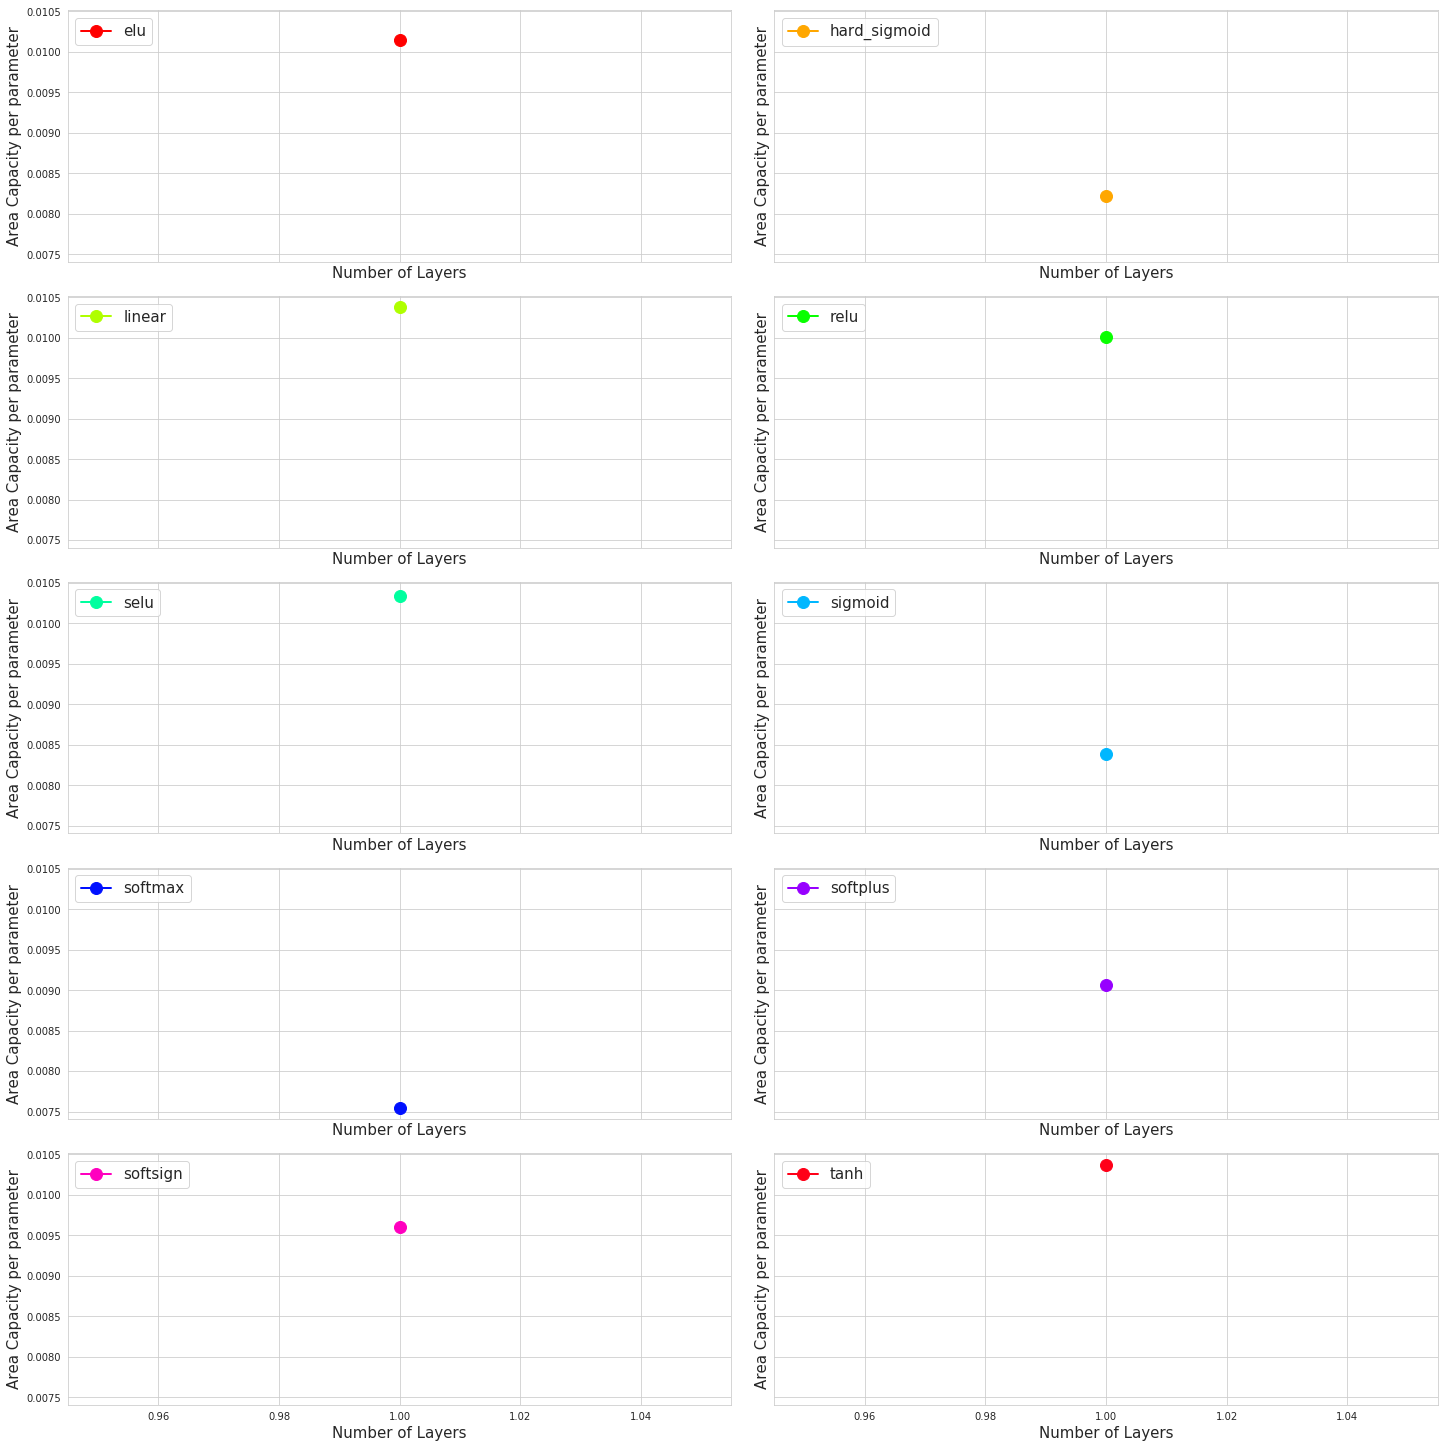

In [48]:
fig = plot_line_sub_plots(df_cap_group, 
            x="num_layers", y="capacity_ratio", hue="activation_func",
            x_label='Number of Layers', y_label='Area Capacity per parameter')

fig.savefig("Images/AreaCapacityPerParameterVsNumLayersActFunc_exp3_1.pdf", bbox_inches='tight')

In [49]:
print("\\begin{table}[h!]")

latex_str = df_cap.groupby(["nn_type", "num_layers", "activation_func"]).agg({"capacity_ratio":"max"}).unstack().to_latex()
latex_str = latex_str.replace("nn\\_type", "RNN Type")
latex_str = latex_str.replace("num\\_layers", "Number of Layers")
latex_str = latex_str.replace("capacity\\_ratio", "Area Capacity Per Parameter")
print(latex_str)


print("""\\caption{Per parameter Area capacity for each RNN \\\\ 
            per activation function  \\\\  
              at various layer depths}""")
print("\\label{tab:Area of patterns per Activation Per RNN Per Layer}")
print("\\end{table}")

\begin{table}[h!]
\begin{tabular}{llrrrrrrrrrr}
\toprule
     & {} & \multicolumn{10}{l}{Area Capacity Per Parameter} \\
     & activation\_func &            elu & hard\_sigmoid &    linear &      relu &      selu &   sigmoid &   softmax &  softplus &  softsign &      tanh \\
RNN Type & Number of Layers &                &              &           &           &           &           &           &           &           &           \\
\midrule
bidirelamn & 1 &       0.011054 &     0.007784 &  0.011054 &  0.011054 &  0.011054 &  0.007784 &  0.007784 &  0.011054 &  0.011054 &  0.011054 \\
bidirgru & 1 &       0.009897 &     0.010379 &  0.012485 &  0.010379 &  0.008818 &  0.010379 &  0.007784 &  0.007784 &  0.010028 &  0.012485 \\
bidirlstm & 1 &       0.008818 &     0.007784 &  0.008929 &  0.008818 &  0.011054 &  0.007784 &  0.007784 &  0.008929 &  0.007784 &  0.008929 \\
elman & 1 &       0.010141 &     0.007784 &  0.011054 &  0.011054 &  0.011054 &  0.008818 &  0.007784 &  0.009897 &  0.0